<a href="https://colab.research.google.com/github/Konstantin5054232/ausbildungsprojekte/blob/main/03_wohnungen_verkauf/wohnungen_verkauf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Immobilienmarktforschung

Wir werden das Archiv der Anzeigen für den Verkauf von Wohnungen in St. Petersburg und benachbarten Siedlungen über mehrere Jahre analysieren. Ziel ist es zu lernen, wie man den Marktwert von Immobilien ermittelt. Es ist notwendig, die Parameter festzulegen, die den Aufbau eines automatisierten Systems zur Verfolgung von Anomalien und betrügerischen Aktivitäten ermöglichen.

Für jede zum Verkauf stehende Wohnung stehen zwei Arten von Daten zur Verfügung. Die ersten werden vom Benutzer eingegeben, die zweiten werden automatisch auf der Grundlage kartografischer Daten erhalten. Zum Beispiel die Entfernung zum Zentrum, Flughafen, nächsten Park und Stausee.

# Datenexploration

In [ ]:
# Wir importieren die notwendigen Bibliotheken
import pandas as pd

In [ ]:
# Wir laden Tabellen mit Daten
data = pd.read_csv('/content/real_estate_data.csv', sep='\t')

In [ ]:
# Wir werden die erhaltenen Daten studieren
display(data.info())
display(data.shape)
display(data.head())
display(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

(23699, 22)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Schlussfolgerungen**

Nachdem wir die Daten untersucht haben, sehen wir, dass der Datenrahmen aus 23699 Zeilen und 22 Spalten besteht. Die Tabelle ist sehr unhandlich, einige Spalten werden zur Beantwortung der Fragen nicht benötigt. Separate Spalten enthalten Nullwerte, irgendwo mehr als die Hälfte davon. Die first_day_exposition-Spalte enthält Informationen über Zeit und Datum, hat aber das Objektdatenformat, die Zeit ist überall Null, sie wird nicht für die Recherche benötigt.

# Datenvorverarbeitung

In [ ]:
# Wir werden Spalten entfernen, die für die Datenanalyse nicht benötigt werden
data = data.drop(['total_images', 'is_apartment', 'studio', 'open_plan', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'], axis=1)

In [ ]:
# Wir zählen die Anzahl der Duplikate mit einer Reihe von Methoden data.duplicated().sum()
display(data.duplicated().sum())

0

In [ ]:
# Wir entfernen die Zeilen, in denen es keine Informationen über die Anzahl der Stockwerke im Haus gibt.
# Es gibt nicht viele solcher Zeilen, das Löschen wird das Ergebnis nicht wesentlich beeinflussen.
data.dropna(subset = ['floors_total'], inplace = True)

In [ ]:
# Wir füllen die Nullwerte in der Balkonspalte mit 0-Werten, da es wahrscheinlich keine Balkone gibt.
data['balcony'] = data['balcony'].fillna(0)

In [ ]:
# Wir werden die Nullwerte in der Spalte cityCenters_nearest mit dem Medianwert für diese Spalte füllen.
# Wir werden Zeilen mit leeren Werten in dieser Spalte nicht löschen, da zu viele von ihnen.
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

In [ ]:
# Wir werden das Datenformat für die Spalte first_day_exposition ändern
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
# Wir übersetzen die Werte der Spalten last_price, Floors_total, Balcony in ganze Zahlen
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

In [ ]:
# Mal sehen was passiert
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23613 non-null  int64         
 1   total_area            23613 non-null  float64       
 2   first_day_exposition  23613 non-null  datetime64[ns]
 3   rooms                 23613 non-null  int64         
 4   ceiling_height        14495 non-null  float64       
 5   floors_total          23613 non-null  int64         
 6   living_area           21743 non-null  float64       
 7   floor                 23613 non-null  int64         
 8   kitchen_area          21382 non-null  float64       
 9   balcony               23613 non-null  int64         
 10  locality_name         23565 non-null  object        
 11  cityCenters_nearest   23613 non-null  float64       
 12  days_exposition       20441 non-null  float64       
dtypes: datetime64[ns

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,Санкт-Петербург,16028.0,NaN
1,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,2,посёлок Шушары,18603.0,81.0
2,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,0,Санкт-Петербург,13933.0,558.0
3,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,0,Санкт-Петербург,6800.0,424.0
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,8098.0,121.0


In [ ]:
# Wir werden die Nullwerte in die Spalten living_area und kitchen_area je nach Anzahl der Zimmer in der Wohnung eintragen
for rooms in data['rooms'].unique():
    median = data.loc[data['rooms'] == rooms, 'living_area'].median()
    data.loc[(data['rooms'] == rooms) & (data['living_area'].isna()), 'living_area'] = median

    median = data.loc[data['rooms'] == rooms, 'kitchen_area'].median()
    data.loc[(data['rooms'] == rooms) & (data['kitchen_area'].isna()), 'kitchen_area'] = median
    
data.info()
data.head() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23613 non-null  int64         
 1   total_area            23613 non-null  float64       
 2   first_day_exposition  23613 non-null  datetime64[ns]
 3   rooms                 23613 non-null  int64         
 4   ceiling_height        14495 non-null  float64       
 5   floors_total          23613 non-null  int64         
 6   living_area           23613 non-null  float64       
 7   floor                 23613 non-null  int64         
 8   kitchen_area          23419 non-null  float64       
 9   balcony               23613 non-null  int64         
 10  locality_name         23565 non-null  object        
 11  cityCenters_nearest   23613 non-null  float64       
 12  days_exposition       20441 non-null  float64       
dtypes: datetime64[ns

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,Санкт-Петербург,16028.0,NaN
1,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,2,посёлок Шушары,18603.0,81.0
2,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,0,Санкт-Петербург,13933.0,558.0
3,64900000,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,0,Санкт-Петербург,6800.0,424.0
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,8098.0,121.0


**Schlussfolgerungen**

Es gibt keine Duplikate. Spalten mit Daten, die für die Analyse nicht benötigt werden, wurden entfernt, um die Tabelle nicht zu überladen. Wir haben die Nullwerte auf unterschiedliche Weise ausgefüllt, abhängig von der Anzahl der Nullwerte und der Bedeutung der in der Spalte enthaltenen Daten. Separat haben wir Nullwerte in die Spalten eingetragen, die Informationen über Wohnfläche und Küchenbereich enthalten: Wir haben Medianwerte in Abhängigkeit von der Anzahl der Zimmer in der Wohnung angegeben, damit die Berechnungen genauer waren. Zur weiteren Analyse haben wir das Datenformat in der Spalte first_day_exposition in datetime64[ns] geändert. Zur leichteren Wahrnehmung wurden die Werte in den einzelnen Spalten in Ganzzahlen umgewandelt. Die Daten sind nun bereit für die Analyse.

# Berechnungen durchführen

In [ ]:
# Wir berechnen die erforderlichen Verhältnisse und ergänzen die Tabelle
data['price_per_meter'] = data['last_price'] / data['total_area']
data['part_living_total'] = data['living_area'] / data['total_area']
data['part_kitchen_total'] = data['kitchen_area'] / data['total_area']

In [ ]:
# Wir extrahieren den Wochentag, den Monat und das Jahr und fügen der Tabelle Spalten hinzu
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [ ]:
# Wir werden eine zusätzliche Spalte mit Bodentypdaten bilden (1 - erste, 3 - letzte, 2 - andere)
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 1
    if floor == floors_total:
        return 3
    return 2

data['floor_type'] = data.apply(floor_type, axis=1)

data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition,price_per_meter,part_living_total,part_kitchen_total,weekday,month,year,floor_type
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,Санкт-Петербург,16028.0,NaN,120370.370370,0.472222,0.231481,3,3,2019,2
1,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,2,посёлок Шушары,18603.0,81.0,82920.792079,0.460396,0.272277,1,12,2018,1
2,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,0,Санкт-Петербург,13933.0,558.0,92785.714286,0.612500,0.148214,3,8,2015,2
3,64900000,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,0,Санкт-Петербург,6800.0,424.0,408176.100629,0.283019,0.059748,4,7,2015,2
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,8098.0,121.0,100000.000000,0.320000,0.410000,1,6,2018,2


**Schlussfolgerungen**

Wir haben der Tabelle Spalten hinzugefügt, die für die weitere Datenanalyse benötigt werden.

# Explorative Datenanalyse

0.9590479820437895
0.9753949095837039
0.9961885402109008
0.6090289247448439


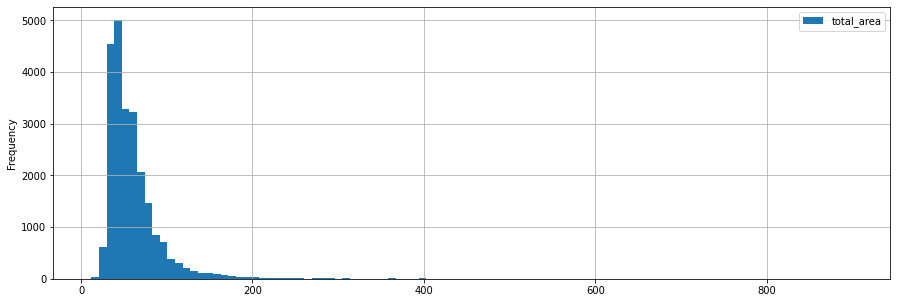

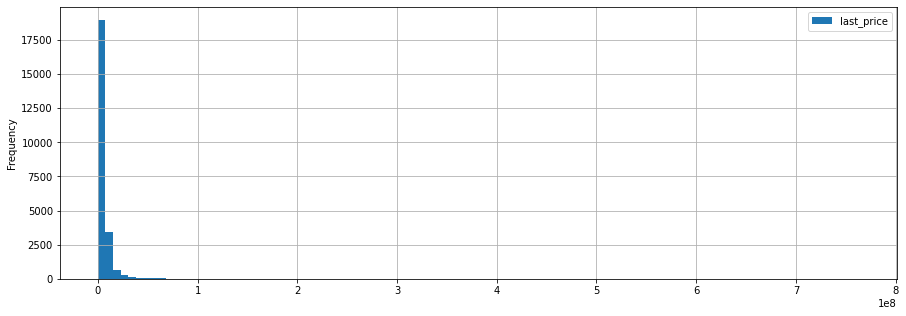

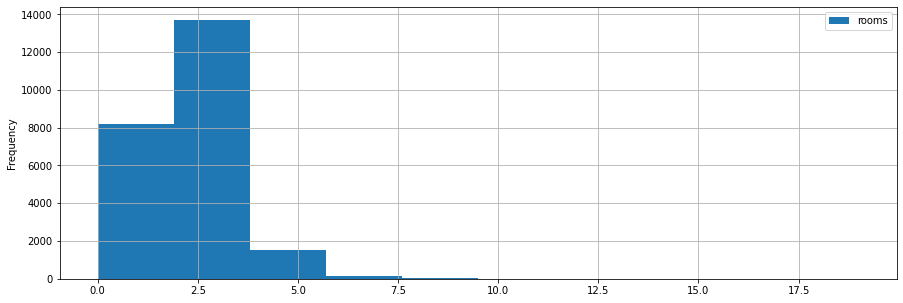

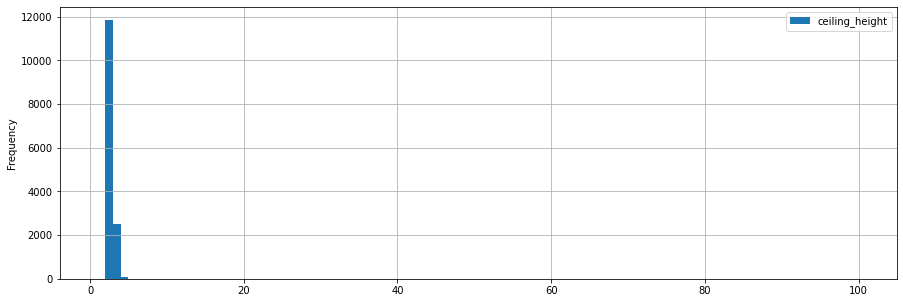

In [ ]:
# Wir erstellen Histogramme für Parameter: Fläche, Preis, Anzahl der Zimmer, Deckenhöhe
data.plot(kind='hist', y='total_area', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='last_price', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='rooms', bins=10, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='ceiling_height', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

print(len(data.query('last_price < 17000000')) / len(data))
print(len(data.query('total_area < 150')) / len(data))
print(len(data.query('rooms < 7')) / len(data))
print(len(data.query('ceiling_height < 4')) / len(data))

Zwischenergebnisse

Wir haben Diagramme ohne Verwendung des Bereichsparameters erstellt. Wir sehen, dass die Gesamtfläche der Wohnungen 1000 Quadratmeter erreicht. m, jedoch gibt es eine kleine Anzahl von Wohnungen mit einer Fläche von über 150 qm. Es gibt separate Emissionen für den Preis von Wohnungen, aber Wohnungen kosten mehr als 17 Millionen Rubel. Sie sind für die Analyse nicht interessant, die Anzahl der Zimmer erreicht 18, für die Analyse beschränken wir uns jedoch auf Wohnungen mit bis zu 7 Zimmern, wir belassen die Deckenhöhe bei maximal 4 Metern.

In [ ]:
# Zur einfacheren Analyse übersetzen wir den Wohnungspreis in Millionen Rubel.
data['last_price_mln'] = data['last_price'] / 1000000

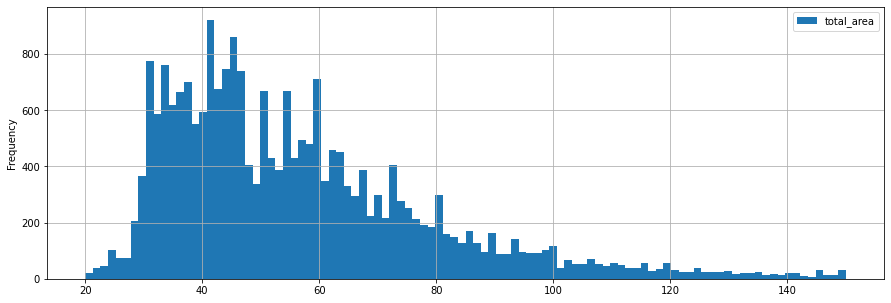

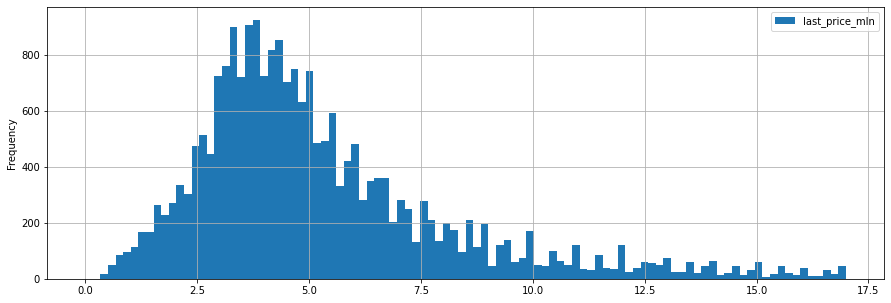

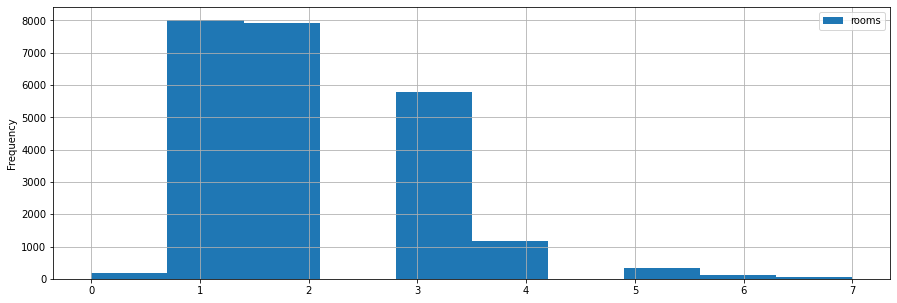

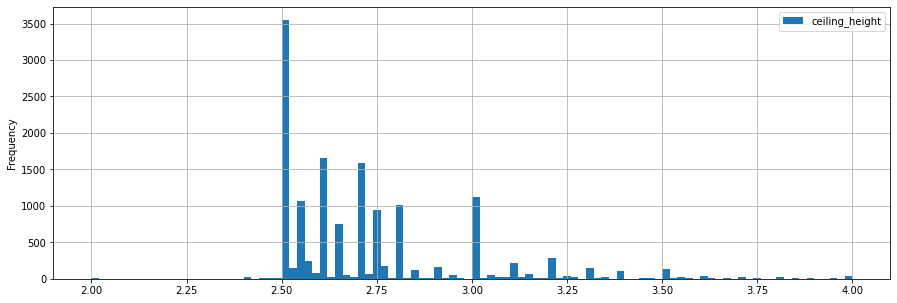

In [ ]:
# Wir werden Histogramme für Parameter erstellen: Fläche, Preis, Anzahl der Zimmer, Deckenhöhe unter Verwendung des Bereichsparameters
data.plot(kind='hist', y='total_area', range=(20, 150), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='last_price_mln', range=(0, 17), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='rooms', range=(0, 7), bins=10, alpha=1, grid=True, legend=True, figsize=(15,5))
data.plot(kind='hist', y='ceiling_height', range=(2, 4), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

In [ ]:
# Wir werden berechnen, welchen Teil der Linien wir genommen haben, um die angegebenen Parameter zu analysieren
print("{:.1%}".format(len(data.query('last_price < 17000000')) / len(data)))
print("{:.1%}".format(len(data.query('total_area < 150')) / len(data)))
print("{:.1%}".format(len(data.query('rooms < 7')) / len(data)))
print("{:.1%}".format(len(data.query('ceiling_height < 4')) / len(data)))

95.9%
97.5%
99.6%
60.9%


**Schlussfolgerungen**

Die meisten Wohnungen werden mit einer Fläche von 30-70 qm verkauft. Wohnungen mit einer Fläche von mehreren hundert Quadratmetern sind eine Seltenheit oder ein Fehler beim Datenupload. Der stärkste Rückgang der Wohnungsfläche wird nach 100 qm beobachtet. Am häufigsten werden Wohnungen im Preisbereich von 3 bis 5 Millionen Rubel verkauft. Wohnungen im Wert von über 10 Millionen Rubel. selten verkauft. Am beliebtesten in Bezug auf die Anzahl der Zimmer sind Ein- und Zweimünzenwohnungen, von denen jeweils etwa 8.000 verkauft wurden. An zweiter Stelle stehen Dreizimmerwohnungen. Wohnungen mit mehr als sieben Zimmern sind sehr selten. Auf dem Histogramm der Deckenhöhe sehen wir, dass dieser Parameter ziemlich standardisiert ist. Die beliebtesten Wohnungen haben eine Deckenhöhe von etwa 2,5 m. Wir haben etwa 40% der Wohnungen für die Deckenhöhenanalyse verworfen, aber wie wir uns erinnern, werden viele Nullwerte für diesen Parameter gesetzt. Bei anderen Parametern haben die von uns vorgenommenen Einschränkungen das Endergebnis nicht wesentlich beeinflusst.

Durchschnitt 180.9
Median 95.0


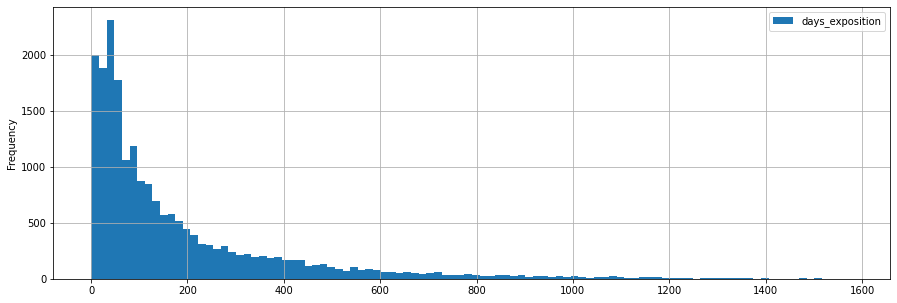

In [ ]:
# Wir untersuchen den Zeitpunkt des Verkaufs einer Wohnung, erstellen ein Histogramm, berechnen den Durchschnitt und den Median.
data.plot(kind='hist', y='days_exposition', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
print('Durchschnitt {:.1f}'.format(data['days_exposition'].mean()))
print('Median {:.1f}'.format(data['days_exposition'].median()))

73.6%


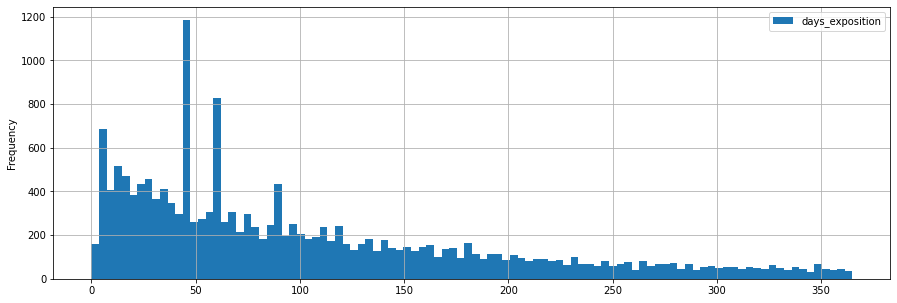

In [ ]:
# Wir erstellen ein Diagramm für Wohnungsverkaufszeiten von weniger als einem Jahr und sehen, wie viele Daten das sind.
print("{:.1%}".format(len(data.query('days_exposition < 365')) / len(data)))
data.plot(kind='hist', y='days_exposition', range=(0, 365), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

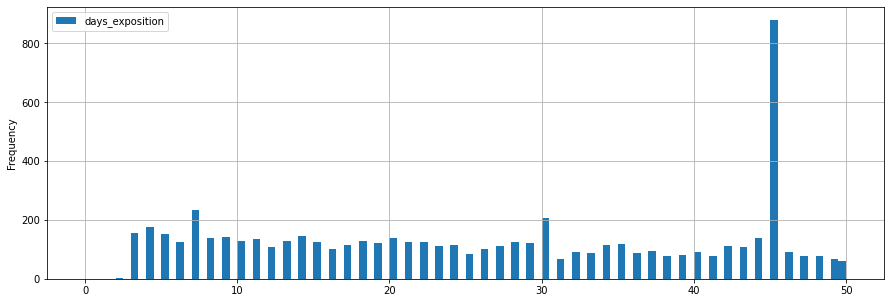

In [ ]:
# Wir erstellen ein Diagramm für die Verkaufsbedingungen von Wohnungen in weniger als 50 Tagen.
data.plot(kind='hist', y='days_exposition', range=(0, 50), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

**Schlussfolgerungen**

Wir haben Diagramme mit unterschiedlicher Anzahl von "Körben" erstellt, um die Antwort auf die gestellte Frage klarer zu erhalten. Alles, was seit mehr als einem Jahr zum Verkauf steht, ist für die Analyse nicht von großem Interesse, es gibt nur sehr wenige solcher Wohnungen. Laut Histogramm sehen wir, dass die meisten Wohnungen innerhalb von zwei Monaten verkauft sind. Es gibt auch anomale Verkaufsbedingungen - etwa 5 Jahre. Vielleicht sind dies Fehler in den Daten, die den arithmetischen Durchschnitt des Zeitraums für den Verkauf von Wohnungen - sechs Monate - erheblich beeinflusst haben. Aussagekräftiger ist in diesem Fall der Wert des Medians – 3 Monate. Interessant ist, dass die meisten Wohnungen genau anderthalb Monate nach Veröffentlichung der Ausschreibung verkauft waren.

Wir können daraus schließen, dass dies ein gutes Ergebnis ist, wenn die Wohnung im ersten Monat verkauft wurde. Wenn mehr als zwei Monate vergangen sind, sollten die Verkäufer höchstwahrscheinlich den Preis des Objekts überdenken.

In [ ]:
# Wir werden uns ansehen, welche Faktoren die Kosten einer Wohnung am meisten beeinflussen
display(data['last_price'].corr(data['total_area']))
display(data['last_price'].corr(data['rooms']))
display(data['last_price'].corr(data['floor_type']))
display(data['last_price'].corr(data['cityCenters_nearest']))
display(data['last_price'].corr(data['weekday']))
display(data['last_price'].corr(data['month']))
display(data['last_price'].corr(data['year']))

data.corr()['last_price'].reset_index()

0.6535810085611219

0.36312416659845514

0.05887556532281145

-0.19051092587721635

0.0012947242289498373

0.002765232657488408

-0.04302312009925655

,index,last_price
0,last_price,1.000000
1,total_area,0.653581
2,rooms,0.363124
3,ceiling_height,0.085435
4,floors_total,-0.006984
5,living_area,0.556011
6,floor,0.026644
7,kitchen_area,0.453906
8,balcony,0.008598
9,cityCenters_nearest,-0.190511


**Schlussfolgerungen**

Natürlich wirken sich die Fläche der zum Verkauf stehenden Wohnung, Wohnfläche, Küchenfläche und die Anzahl der Zimmer am stärksten auf den Preis aus. Wir sehen keinen signifikanten Einfluss der Art der Etage auf den Preis, aber dieses Problem erfordert eine tiefere Untersuchung: Es ist die erste Etage, die die Kosten der Wohnung stark senkt, und nicht die letzte.

Ein umgekehrt proportionaler Zusammenhang zwischen dem Preis einer Wohnung und der Entfernung vom Zentrum ist offensichtlich: Je größer die Entfernung vom Zentrum, desto geringer sind die Kosten für die Wohnung.

Wochentag, Monat und Jahr der Schaltung einer Anzeige für den Verkauf einer Wohnung haben keinen Einfluss auf den Preis.

In [ ]:
# Wir werden 10 Siedlungen mit der größten Anzahl von Anzeigen auswählen, 
# den durchschnittlichen Quadratmeterpreis in diesen Siedlungen berechnen, 
# die Siedlungen mit den höchsten und niedrigsten Wohnkosten auswählen.
data_new = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean', 'count'])
data_new.columns = ['mean', 'count'] 
data_new.sort_values('count', ascending=False).head(10)

,mean,count
locality_name,,
Санкт-Петербург,114868.877341,15651
посёлок Мурино,85673.259928,520
посёлок Шушары,78551.344545,439
Всеволожск,68654.473986,398
Пушкин,103125.819291,369
Колпино,75424.579098,338
посёлок Парголово,90175.913458,327
Гатчина,68746.146763,307
деревня Кудрово,92473.547576,299


**Schlussfolgerungen**

Von den 10 Siedlungen mit der größten Anzahl von Anzeigen sind die höchsten Durchschnittskosten pro Quadratmeter Wohnung natürlich in St. Petersburg, die niedrigsten in Wyborg.

In [ ]:
# Wir werden Wohnungen in St. Petersburg auswählen, 
# eine Spalte mit der Entfernung zum Zentrum in Kilometern erstellen und auf ganzzahlige Werte runden.
flats_SPB = data[data['locality_name'] == 'Санкт-Петербург']
flats_SPB['to_centr_km'] = (flats_SPB['cityCenters_nearest'] / 1000).astype('int')
flats_SPB.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,days_exposition,price_per_meter,part_living_total,part_kitchen_total,weekday,month,year,floor_type,last_price_mln,to_centr_km
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,...,NaN,120370.370370,0.472222,0.231481,3,3,2019,2,13.000,16
2,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,0,...,558.0,92785.714286,0.612500,0.148214,3,8,2015,2,5.196,13
3,64900000,159.0,2015-07-24,3,NaN,14,45.0,9,9.5,0,...,424.0,408176.100629,0.283019,0.059748,4,7,2015,2,64.900,6
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,...,121.0,100000.000000,0.320000,0.410000,1,6,2018,2,10.000,8
7,7915000,71.6,2019-04-18,2,NaN,24,30.5,22,18.9,2,...,NaN,110544.692737,0.425978,0.263966,3,4,2019,2,7.915,11


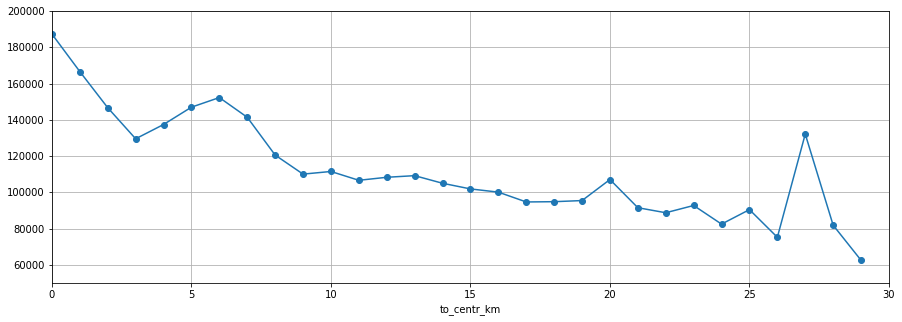

In [ ]:
# Wir berechnen den Durchschnittspreis pro Kilometer
price_per_meter_mean = flats_SPB.groupby('to_centr_km')['price_per_meter'].mean()

# Wir zeichnen die Abhängigkeit des Preises einer Wohnung von der Entfernung zum Stadtzentrum auf
price_per_meter_mean.plot(x='to_centr_km', y='price_per_meter', style='o-', xlim=(0, 30), ylim=(50000, 200000), figsize=(15, 5), grid=True)

Schlussfolgerungen

Aus der Grafik können wir schließen, dass sich die zentrale Zone in einem Umkreis von acht Kilometern um das Zentrum befindet.

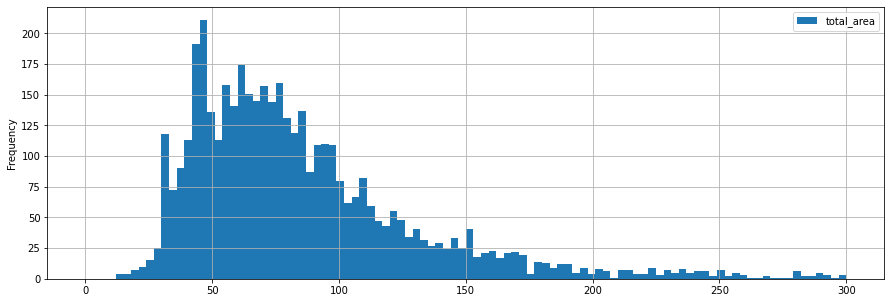

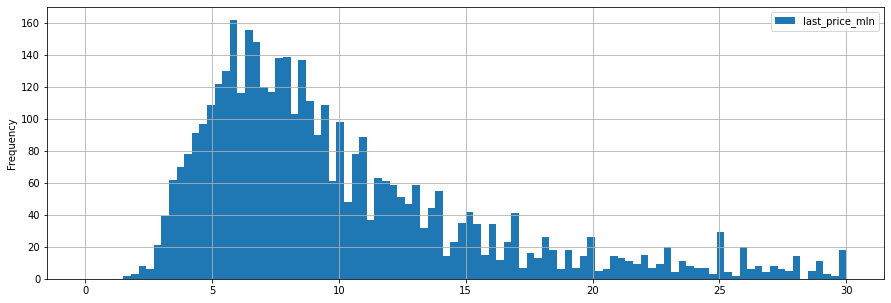

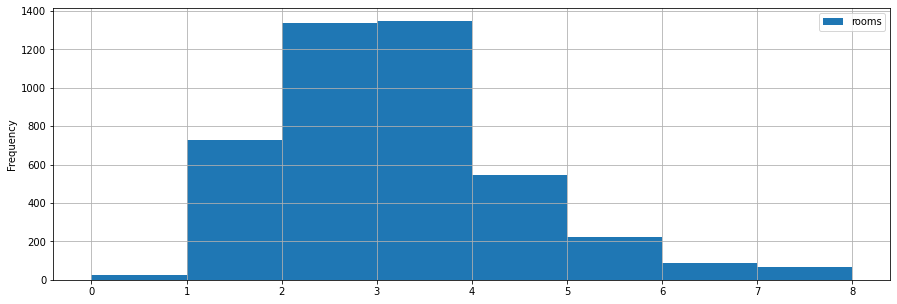

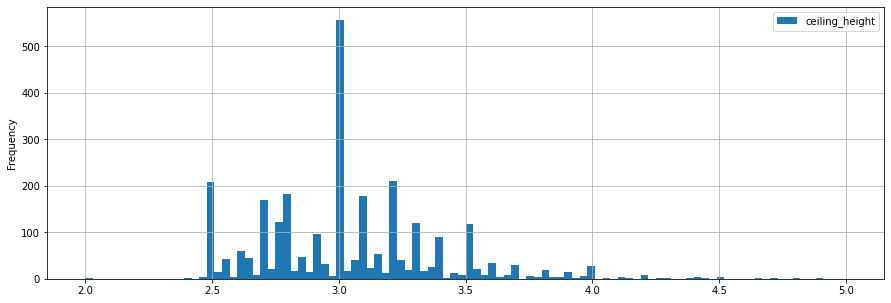

In [ ]:
# Wir werden ein Segment von Wohnungen im Stadtzentrum auswählen, 
# dieses Gebiet analysieren und die folgenden Parameter untersuchen: Fläche, Preis, Anzahl der Zimmer, Deckenhöhe.
flats_SPB_centr = flats_SPB[flats_SPB['to_centr_km']<=8]

flats_SPB_centr.plot(kind='hist', y='total_area', range=(0, 300), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
flats_SPB_centr.plot(kind='hist', y='last_price_mln', range=(0, 30), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
flats_SPB_centr.plot(kind='hist', y='rooms', range=(0, 8), bins=8, alpha=1, grid=True, legend=True, figsize=(15,5))
flats_SPB_centr.plot(kind='hist', y='ceiling_height', range=(2, 5), bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

In [ ]:
# Wir werden berechnen, welchen Teil der Linien wir genommen haben, um die angegebenen Parameter zu analysieren
print("{:.1%}".format(len(flats_SPB_centr.query('total_area < 300')) / len(flats_SPB_centr)))
print("{:.1%}".format(len(flats_SPB_centr.query('last_price_mln < 30')) / len(flats_SPB_centr)))
print("{:.1%}".format(len(flats_SPB_centr.query('rooms < 8')) / len(flats_SPB_centr)))
print("{:.1%}".format(len(flats_SPB_centr.query('ceiling_height < 5')) / len(flats_SPB_centr)))

98.9%
93.2%
99.5%
65.3%


**Schlussfolgerungen**

Wir sehen, dass sich in der Innenstadt das Angebot an zum Verkauf stehenden Wohnungen nach rechts verschiebt: Die meisten zum Verkauf stehenden Wohnungen sind 40-100 qm groß. Der stärkste Rückgang der Wohnungsfläche wird nach 200 qm beobachtet. Wohnungen im Stadtzentrum sind teurer, meistens werden Wohnungen in der Preisklasse von 3 bis 14 Millionen Rubel verkauft. Viele Wohnungen kosten zwischen 20 und 30 Millionen Rubel.

Am beliebtesten in Bezug auf die Anzahl der Zimmer sind bereits Zwei- und Dreizimmerwohnungen, Einzimmerwohnungen sind auf den zweiten Platz gerückt. Auch viele Vierzimmerwohnungen stehen zum Verkauf – mehr als 500. Auf dem Deckenhöhenhistogramm sehen wir, dass Wohnungen mit einer Deckenhöhe von 3 Metern einen absoluten Vorsprung in der Mitte einnehmen. Es ist offensichtlich, dass sich im zentralen Teil der Stadt die meisten Häuser aus vorrevolutionärer Bauweise befinden.

In [ ]:
# Wir untersuchen den Einfluss verschiedener Faktoren auf die Kosten einer Wohnung
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['total_area']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['rooms']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['floor_type']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['cityCenters_nearest']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['weekday']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['month']))
display(flats_SPB_centr['last_price'].corr(flats_SPB_centr['year']))

flats_SPB_centr.corr()['last_price'].reset_index()

0.6411725061469974

0.3450224274581447

0.09878285750153576

-0.10026105084964257

0.019812850755545355

-0.0035339430539036683

-0.048747963325269254

,index,last_price
0,last_price,1.000000
1,total_area,0.641173
2,rooms,0.345022
3,ceiling_height,0.042884
4,floors_total,0.024109
5,living_area,0.532951
6,floor,0.106708
7,kitchen_area,0.429008
8,balcony,0.052346
9,cityCenters_nearest,-0.100261


**Schlussfolgerungen**

Wie zuvor sehen wir, dass der Preis am stärksten von der Fläche der verkauften Wohnung, der Wohnfläche, beeinflusst wird. Küchenbereich sowie die Anzahl der Zimmer. Der Einfluss des Bodentyps auf den Preis hat merklich zugenommen. Es ist davon auszugehen, dass es im Zentrum viele Touristen gibt, der Autoverkehr ist viel höher, was das Leben im Erdgeschoss weniger komfortabel macht.

Die Abhängigkeit des Wohnungspreises von der Entfernung zum Zentrum hat abgenommen. Es ist verständlich, das ist das Zentrum.

Der Wochentag, der Monat und das Jahr der Schaltung einer Anzeige für den Verkauf einer Wohnung haben noch keinen Einfluss auf den Preis.

# Allgemeine Schlussfolgerung

Wir haben mehrere Jahre lang eine Studie über Anzeigen für den Verkauf von Wohnungen in St. Petersburg und benachbarten Siedlungen durchgeführt.

Die zur Analyse bereitgestellten Daten enthielten eine Reihe erheblicher Mängel, die behoben wurden.

Wir haben einige wichtige Kennziffern errechnet, die wir für die Analyse benötigen: den Quadratmeterpreis, den Anteil von Wohn- und Küchenfläche an der Gesamtfläche der Wohnung. Für die weitere Analyse wurde ermittelt, welche Wohnungen sich im Erdgeschoss, welche im Dachgeschoss und welche in anderen Geschossen befinden. Ausgewählter Wochentag, Monat und Jahr ab dem Datum der Schaltung der Anzeige für den Verkauf der Wohnung.

Im Durchschnitt werden Wohnungen für 1,5-3 Monate verkauft. Wenn in dieser Zeit kein Käufer gefunden wurde, sollten die Verkäufer den Preis der Wohnung nach unten korrigieren.

Von den 10 Standorten mit der größten Anzahl von Anzeigen, die höchsten durchschnittlichen Kosten pro Quadratmeter Wohnraum in St. Petersburg, die niedrigsten - in Wyborg.

Als nächstes haben wir Parameter wie Wohnungspreis, Gesamtfläche, Anzahl der Zimmer und Deckenhöhe für alle Wohnungen und für Wohnungen im Zentrum von St. Petersburg analysiert. Als Ergebnis kamen wir zu dem Ergebnis, dass Wohnungen in der Innenstadt im Durchschnitt eine größere Fläche haben, teurer sind, mehr Zimmer haben und die Decken in der Innenstadt höher sind.

Es war interessant zu vergleichen, wie sich einzelne Faktoren auf die Kosten aller untersuchten Wohnungen und Wohnungen im Zentrum von St. Petersburg auswirken. In beiden Fällen wird der Preis einer Wohnung durch ihre Fläche und die Anzahl der Zimmer beeinflusst. Die Art der Etage, auf der sich die Wohnung befindet, hat einen größeren Einfluss auf den Preis in der Innenstadt. Je weiter die Wohnung vom Zentrum entfernt ist, desto billiger ist sie, aber der Wochentag, der Monat und das Jahr der Platzierung einer Anzeige für den Verkauf einer Wohnung haben keinen Einfluss auf den Preis.